# Demo for how to fit a single period of biastable bias for further removal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from scipy.optimize import curve_fit

from sl2pm.bistable_bias import bb_single

## Load single period (averaged) of bistable bias from one PMT (GaAsP)

In [2]:
t, y = np.load('pmt_bistable_bias.npy') # Single period of the bistable bias from a GaAsP PMT
bb_period = 0.00331 # period of the bistable bias  in sec

## Intitial values for the fit

In [3]:
p0 = dict(t0=0.00072804, 
            w=0.00052, 
            tau1=5e-5, 
            tau2=2.1e-5, 
            dI1=5.8, 
            dI2=13.5, 
            I0=176.7)

Text(0.5, 0, 'Time (sec)')

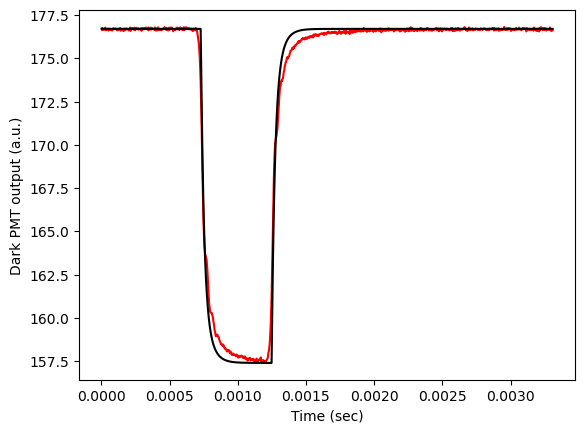

In [4]:
plt.plot(t, y, c='r')

plt.plot(t, bb_single(t, *p0.values(), dt=bb_period), c='k')

plt.ylabel('Dark PMT output (a.u.)')
plt.xlabel('Time (sec)')

## Fit single period of bistable bias

In [5]:
popt, pcov = curve_fit(partial(bb_single, dt=bb_period), t, y, list(p0.values()))

/Users/drkutuzov/code/sl2pm/examples/bistable_bias/../../sl2pm/bistable_bias.py:6: RuntimeWarning: overflow encountered in exp
  return np.where(t>=0, dI1*(1 - np.exp(-t/tau1)) + dI2*(1 - np.exp(-t/tau2)), np.zeros(shape=t.shape))
/Users/drkutuzov/code/sl2pm/examples/bistable_bias/../../sl2pm/bistable_bias.py:6: RuntimeWarning: overflow encountered in multiply
  return np.where(t>=0, dI1*(1 - np.exp(-t/tau1)) + dI2*(1 - np.exp(-t/tau2)), np.zeros(shape=t.shape))


Text(0.5, 0, 'Time (sec)')

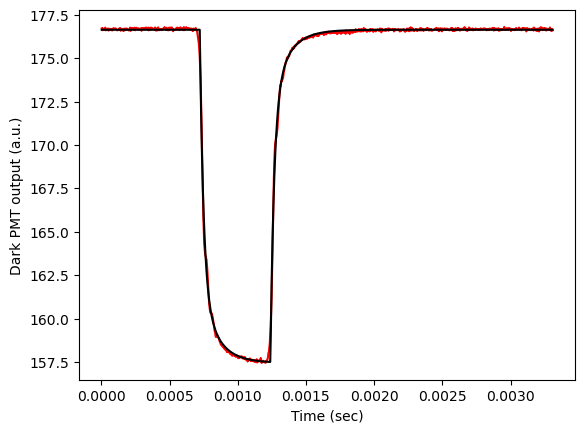

In [6]:
plt.plot(t, y, c='r')

plt.plot(t, bb_single(t, *popt, dt=bb_period), c='k')

plt.ylabel('Dark PMT output (a.u.)')
plt.xlabel('Time (sec)')

## Fitted parameters

In [7]:
for name, val in zip(p0.keys(), popt):
    print(f'{name} = {val:.6f}')

t0 = 0.000721
w = 0.000518
tau1 = 0.000114
tau2 = 0.000027
dI1 = 4.592007
dI2 = 14.611318
I0 = 176.649415
